In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# Importing the dataset
dataset = pd.read_csv('Ads_Optimisation.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.3 KB


### Running 10000 times each time selecting random Ad

In [2]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)  # Generate random number from range 0-10
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [3]:
total_reward

1267

In [5]:
pd.Series(ads_selected).tail(1000).value_counts()

2    121
9    116
3    110
7    101
5     97
6     95
1     95
0     93
8     86
4     86
dtype: int64

#### As this algorithm is not learning anything, it will not smartly select any ad which is giving the maximum return. And hence even if we look at the last 1000 trials, we can see above that it is not able to find the optimal ad.

In [6]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [7]:
total_reward

2125

In [8]:
num_series = pd.Series(numbers_of_selections)

In [9]:
num_series

0     947
1     417
2     338
3     380
4    5630
5     180
6     435
7    1106
8     352
9     215
dtype: int64

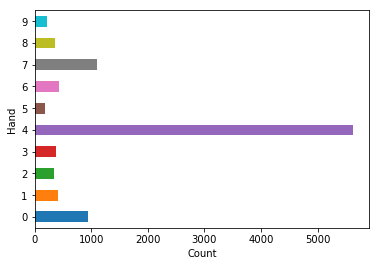

In [12]:
jb = num_series.plot(kind='barh')
jb.set_xlabel("Count")
jb.set_ylabel("Hand")

In [14]:
pd.Series(ads_selected).head(2000).value_counts()

4    547
7    313
0    216
3    163
8    156
1    156
6    134
2    122
9    105
5     88
dtype: int64

### After just 2000 trials, UCB1 is already favouring Ad #5 (index 4) which happens to be the optimal ad, and gets the maximum return for the given problem.

